# Portfolio 2: Analysing COVID-19 Data

For the second portfolio we'll look at the most relevant dataset to our lives at the moment: the global spread of COVID-19.   There is an open dataset avaialable that is updated often showing the number of cases in different regions of the world.  This is the source of the graphs and visualisations that you'll see on the news. 

Here are some sample stories for reference:

* [From the ABC](https://www.abc.net.au/news/2020-03-26/coronavirus-covid19-global-spread-data-explained/12089028)
* [From the Guardian](https://www.theguardian.com/australia-news/datablog/ng-interactive/2020/apr/06/coronavirus-cases-in-australia-map-curve-confirmed-numbers-stats-how-many-covid-19-nsw-by-postcode-maps-victoria-live-data-qld-sa-wa-tas-nt-act-latest-statistics)
* [Coronavirus in Australia](https://www.covid19data.com.au/)
* [ArcGIS Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) Johns Hopkins


In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from datetime import time
import seaborn as sns

%matplotlib inline

## Getting the Data

The first step is to get a copy of the raw data.  The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). We're interestd in the global confirmed cases dataset but you can also get data on deaths and recovered cases.  

You can either download a copy of the data into your project or just read it from the URL. The advantage of reading the URL is that you'll get live updates, but this might make it harder for you to repeat your experiments if the data changes.  Also, you would be making new requests for data every time you ran your worksheet putting load on the server (and your own network connection).  Consider downloading a copy as you are developing your worksheet and then switching to the live version once everything is debugged. (Eg. you could clone the github repository and copy the relevant data file into this project).

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

In [3]:
#Displays the first five entries of our dataframe covid
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [4]:
covid.shape

(266, 123)

## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country.  This can be done using the [`groupby`](https://pandas.pydata.org/docs/getting_started/10min.html#grouping) method and the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.  We can use these to make a new dataframe containing just the numerical data.

In [5]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

In [6]:
grouped.shape

(188, 119)

In [7]:
grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
Albania,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
Algeria,0,0,0,0,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
Andorra,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


You can now select just the data for one country [using the `loc` method](https://pandas.pydata.org/docs/getting_started/10min.html#selection) since the new dataframe will have the grouped values (Countries) as the row labels. Select the data for one country (you choose which) and plot it.  You should see the exponential rise in case numbers over time.

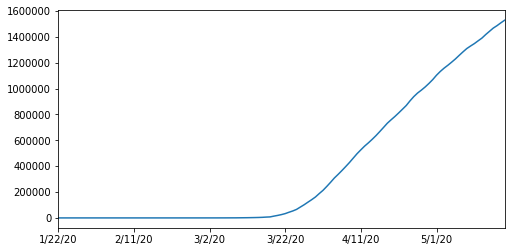

In [8]:
#loc method is used to filter and select data based on labels
#Our labels are 'Country/Region' and dates
plt.figure(figsize=(8,4))
df =grouped.loc['US']
df.plot.line()

## Comparing Countries

One of the classic displays in the news is the comparison between countries.  Select a number of countries and plot their data on the same graph to reproduce this visualisation. Suitable countries would be those who have significant outbreaks - China, USA, Italy, UK, Australia. 

In [9]:
a= grouped.loc['China']
b= grouped.loc['US']
c= grouped.loc['Italy']
d= grouped.loc['United Kingdom']
e= grouped.loc['Australia']
g= grouped.loc['Ireland']
h= grouped.loc['India']

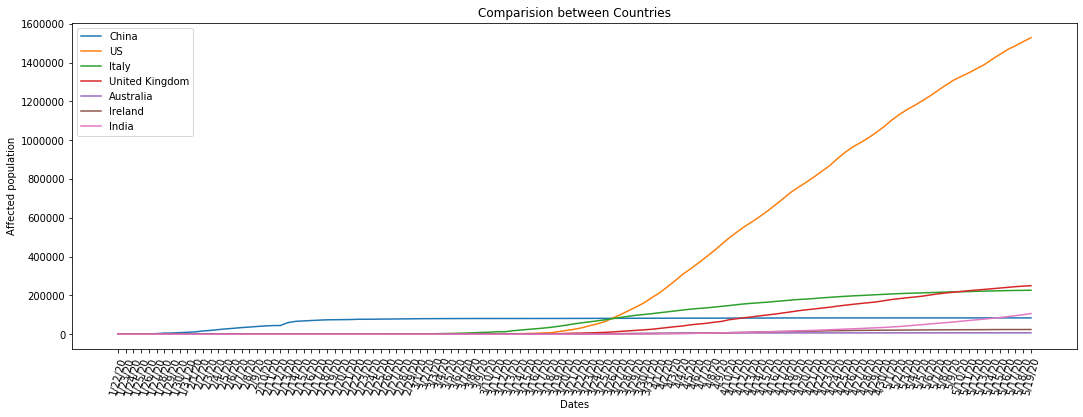

In [10]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.plot(a, label= 'China')
plt.plot(b, label= 'US')
plt.plot(c, label= 'Italy')
plt.plot(d, label= 'United Kingdom')
plt.plot(e, label= 'Australia')
plt.plot(g, label= 'Ireland')
plt.plot(h, label= 'India')


#Adding legend, title and labels
plt.title('Comparision between Countries')
plt.xlabel('Dates')
plt.ylabel('Affected population')
plt.legend()

plt.show()

* Here 'Country/Region' is as an index. Here we want to plot for different countries. So I have selected the data using loc on the index.

**Challenge** A very useful visualisation shows the data for different countries aligned from the time that they have 100 confirmed cases.  To create this figure, you need to take only the part of each time series after the value is greater than or equal to 100 and then plot this starting at 0 on the x-axis.  This is a bit more involved but will allow you to explore Pandas a bit more.

In [11]:
my_analysis = grouped.copy()

In [12]:
# Iterated over the column values for original data
# if the value is less than 100 then it is set to NaN
# Using loc filtered out the countries in interest
for col in my_analysis.columns:
    my_analysis[col][my_analysis[col] < 100] = 'NaN'

my_countries =my_analysis.loc[['Australia','China','Italy','US','United Kingdom','India']]

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
my_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84010,84011,84018,84024,84029,84038,84044,84054,84063,84063
Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219070,219814,221216,222104,223096,223885,224760,225435,225886,226699
US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757,1508308,1528568
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220449,224332,227741,230985,234440,238004,241461,244995,247709,250138
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67161,70768,74292,78055,81997,85784,90648,95698,100328,106475


In [14]:
# Created a copy to use for later analysis
mylist=my_countries 

In [15]:
# Created a transpose of the dataframe for better evaluation and representation
my_countries=my_countries.T

In [16]:
my_new_countries=my_countries#.rename_axis("Dates")

In [17]:
my_new_countries

Country/Region,Australia,China,Italy,US,United Kingdom,India
1/22/20,NaN,548,NaN,NaN,NaN,NaN
1/23/20,NaN,643,NaN,NaN,NaN,NaN
1/24/20,NaN,920,NaN,NaN,NaN,NaN
1/25/20,NaN,1406,NaN,NaN,NaN,NaN
1/26/20,NaN,2075,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5/15/20,7035,84038,223885,1442824,238004,85784
5/16/20,7044,84044,224760,1467820,241461,90648
5/17/20,7054,84054,225435,1486757,244995,95698
5/18/20,7068,84063,225886,1508308,247709,100328


In [18]:
# Dropped the NaN cells
# Done this to ignore the cells below 100
my_new_countries=my_new_countries[(my_new_countries != 'NaN').all(1)]

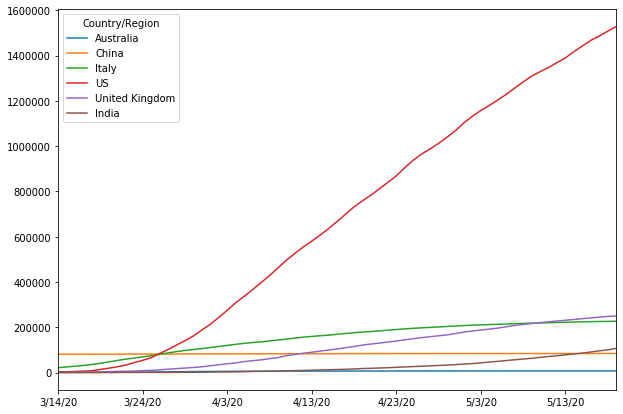

In [19]:
plt.rcParams['figure.figsize'] = (10,7)
my_new_countries.plot()

Text(0, 0.5, 'Affected Population')

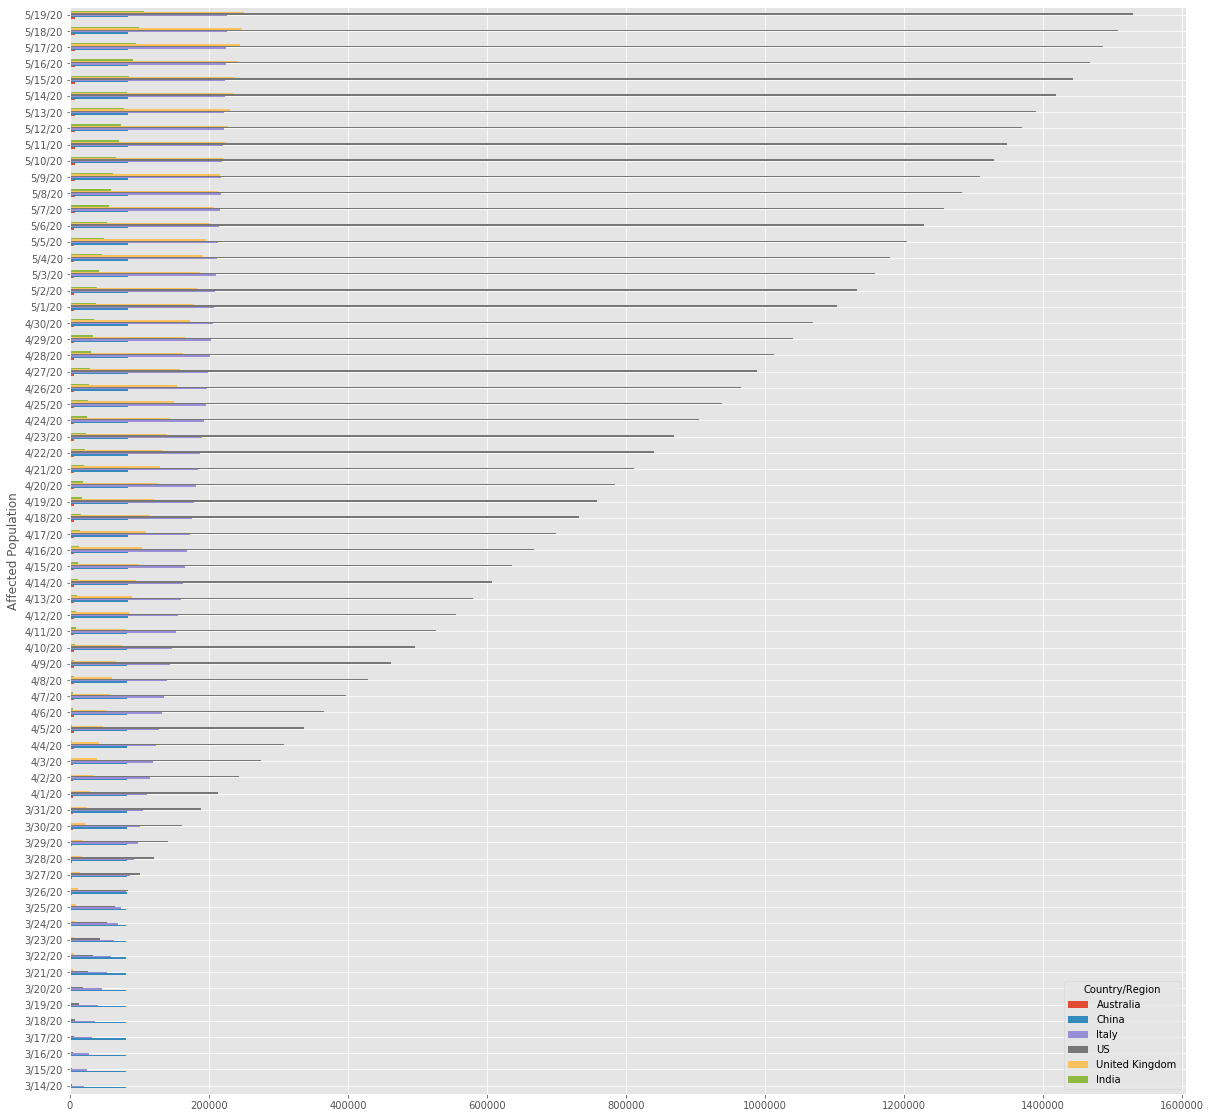

In [20]:
#Used Bar plot to plot the values 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
plt.style.use('ggplot')


my_new_countries.plot(kind='barh')
plt.ylabel('Affected Population')

## Normalisation by Population

The raw data includes the overall count of cases in each country. Clearly small countries will have smaller overall values than large countries.  It would be interesting to see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population. (A good way to measure this is the number of cases per million people in the population. If a country has 25 cases and a population of 2.5 million they would have 10 cases per million).

To answer these questions we need population data. I'll present two possible sources of data (there are more of course) [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) has data per country up to 2016 in a handy CSV format. The [United Nations Population Dynamics page](https://population.un.org/wpp/Download/Standard/CSV/) has data that predicts populations up to 2100 in CSV format.  Use one of these data sets to compute the number of confirmed cases for each country per million population.   Create a new plot with this data. Create a plot to compare the most recent day's data - which country has the most cases per million right now? 

_Note, to use the population data you'll have to make sure that the country names match up in the different data sets. There's no magic way to do this, either you edit one of the datasets or write code to modify the data once you read it in.  The second of these is better because it makes it easy for someone else to repeat your analysis._

* Downloaded the data from the given source and saved into population dataframe

In [21]:
population = pd.read_csv('data/population-figures-by-country-csv_csv.csv')
population.sample()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
213,South Sudan,SSD,2955152.0,3011110.0,3069913.0,3131557.0,3196113.0,3263638.0,3334191.0,3407800.0,...,8856800.0,9263136.0,9670667.0,10067192.0,10448857.0,10818258.0,11177490.0,11530971.0,11882136.0,12230730.0


In [22]:
#Create a new dataframe which contains only the country name and the latest population recorded
country_population= population[['Country', 'Year_2016']]
country_population['Country']=country_population.loc[:,'Country']
country_population

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Year_2016
0,Aruba,104822.0
1,Afghanistan,34656032.0
2,Angola,28813463.0
3,Albania,2876101.0
4,Andorra,77281.0
...,...,...
258,Kosovo,1816200.0
259,"Yemen, Rep.",27584213.0
260,South Africa,55908865.0
261,Zambia,16591390.0


In [23]:
# Extracted the data for countries in interest
co = ['Australia','China','Italy','United States','United Kingdom','Ireland','India']
country_population= country_population.loc[country_population['Country'].isin(co)]

In [24]:
# As US isn't matching with the grouped dataframe, replaced it using replace method
country_population["Country"].replace({"United States": "US"}, inplace=True)
country_population

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Country,Year_2016
11,Australia,2.412716e+07
38,China,1.378665e+09
79,United Kingdom,6.563724e+07
107,India,1.324171e+09
108,Ireland,4.773095e+06
113,Italy,6.060059e+07
248,US,3.231275e+08


In [25]:
#Used iloc to get the last recorded data column and reset the index as column
latest = mylist['5/19/20']
latest_df = latest.to_frame()
latest_df.reset_index(level=0, inplace=True)

latest_df['Country/Region']=latest_df['Country/Region']
latest_df

,Country/Region,5/19/20
0,Australia,7072
1,China,84063
2,Italy,226699
3,US,1528568
4,United Kingdom,250138
5,India,106475


In [26]:
#Merge the two dataframes
dfinal = country_population.merge(latest_df, how='inner', left_on='Country', right_on='Country/Region')

In [27]:
dfinal=dfinal.drop(['Country/Region'], axis=1)

In [28]:
#Modify the dataframe accoridng to our requirements

dfinal.rename(columns = {'Year_2016':'Total Population', '5/19/20':'Affected Population',}, inplace = True) 
dfinal

,Country,Total Population,Affected Population
0,Australia,2.412716e+07,7072
1,China,1.378665e+09,84063
2,United Kingdom,6.563724e+07,250138
3,India,1.324171e+09,106475
4,Italy,6.060059e+07,226699
5,US,3.231275e+08,1528568


In [29]:
# Calculate the number of cases per million of the population and add a column for it in dfinal dataframe
dfinal["per million cases"] = ((dfinal["Affected Population"]/dfinal["Total Population"])*100000)
dfinal

,Country,Total Population,Affected Population,per million cases
0,Australia,2.412716e+07,7072,29.3114
1,China,1.378665e+09,84063,6.09742
2,United Kingdom,6.563724e+07,250138,381.092
3,India,1.324171e+09,106475,8.04088
4,Italy,6.060059e+07,226699,374.087
5,US,3.231275e+08,1528568,473.054


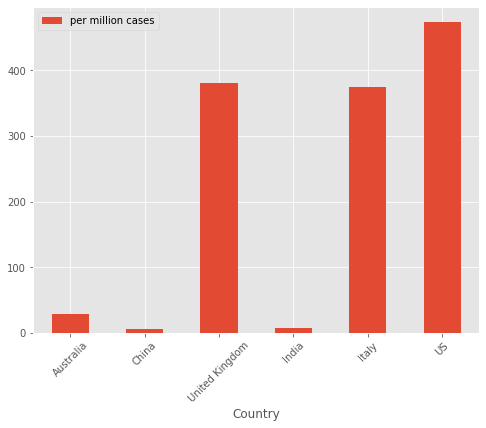

In [30]:
rcParams['figure.figsize'] = 8, 6
ax = dfinal.plot.bar(x='Country', y='per million cases', rot=45)

### Obseravtions
* Calculated the number of cases per million and plotted them.
* It is clear from the graph that US has highest number of cases per million followed by UK and Italy

### A Predictive Model
It is well understood that the spread of the virus follows an exponential pattern. This is because each infected person infects more than one new person on average, leading to exponential growth. This is why the key to stopping the growth of the pandemic is to reduce the number of people infected by stopping contact and isolating infected poeple.

An exponential curve has the equation  𝑦=𝑒𝑚𝑥 . It can be converted to a linear relationship by taking the logarithm of each side:  𝑙𝑜𝑔(𝑦)=𝑚𝑥 . This means that we can fit a linear regression model to the data as long as we take the log of the number of cases.

Select a country with a clear exponential curve (for example, the US) and build a linear regression model to predict the log of the number of case. Test how well the model fits the data.

Now, select the data from China. This should show some divergence from the model since they have managed to slow the growth of cases. Can you show from the model that China's data does not show exponential growth? If China had not acted to stop the virus, how many cases would there be now according to this simple model?

Can you use this metric to identify countries where the virus is under control and those where it is not?

### Building the Predictive Models

##### Considering US

In [31]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Get data for selected countries and take transpose of the result
model_countries = grouped.loc[['Australia','China','Italy','US','United Kingdom','India']].T

In [33]:
model_countries.index=pd.to_datetime(model_countries.index)

In [70]:
y = np.reshape(np.log(model_countries["US"].values), (-1, 1))
X = np.reshape([np.log(i.timestamp()) for i in model_countries.index], (-1, 1))

In [100]:
for i in model_countries.index:
    i
print(i)
i.timestamp()

2020-05-19 00:00:00


1589846400.0

In [95]:
np.log(i.timestamp())

21.18690324473852

We divide the data into attributes and labels. Attributes are the independent variable and labels are dependent varibales/ variable to be predicted. Since we are predicting the data for US it is our label i.e. y and the entire dataset is attribute. Also as 2-D data is expected by sklearn we reshape the data.

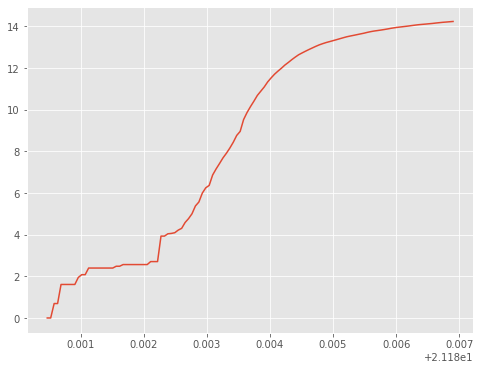

In [35]:
plt.figure(figsize=(8,6))
_ = plt.plot(X,y)

    - It is evident from the graph that there is some what linear relationship between X and y
    - Steps for building a linear regression model.
     1. Split the data into test and train by using the test_size as 25%
     2. Fit the model i.e. to train our model by passing fit() method to our traning dataset
     3. Predict the test data. This will show how accurately the model predicts

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

MSE: 1.501590770131835
R^2: 0.9390499736984278


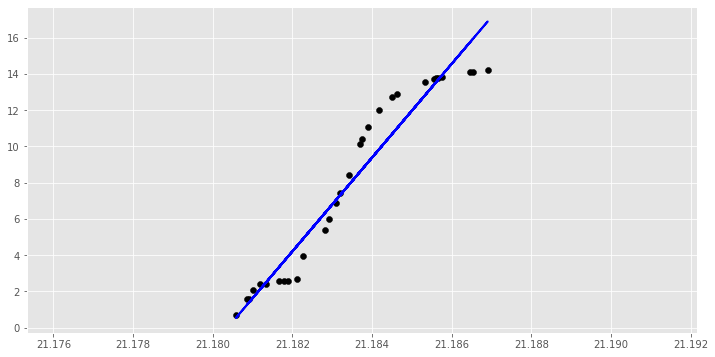

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))
print("R^2:", r2_score(y_test, pred))

plt.figure(figsize=(12,6))
_ = plt.scatter(X_test, y_test,  color='black')
_ = plt.plot(X_test, pred, color='blue', linewidth=2)

There appears to be a clear linear relationship from the graph plot. The value for R^2 is very close to 1 i.e. 0.94, our model can predict 94% varition in the response variable which is a good indicator. Mean square error is the average of the square of the error and should be ideally low. A large value is not considered for the model. As we get a value of 1.5 for MSE and 0.94 for R^2 we can consider our model as a good fit.

#### Variation in number of cases in China and US 

Text(0.5, 1, 'China')

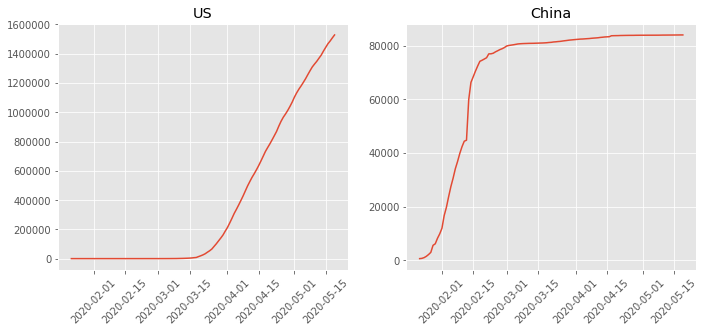

In [38]:
rcParams['figure.figsize'] = 10, 4
fig, ax = plt.subplots(1, 2)

_=ax[0].plot(model_countries.index, model_countries['US'])
_=ax[1].plot(model_countries.index, model_countries['China'])
fig.tight_layout()

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

ax[0].set_title('US')
ax[1].set_title('China')

In [49]:
model_countries['US']

2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
               ...   
2020-05-15    1442824
2020-05-16    1467820
2020-05-17    1486757
2020-05-18    1508308
2020-05-19    1528568
Name: US, Length: 119, dtype: int64

##### Considering China

MSE: 26.677673450657757
R^2: 0.396897248492284


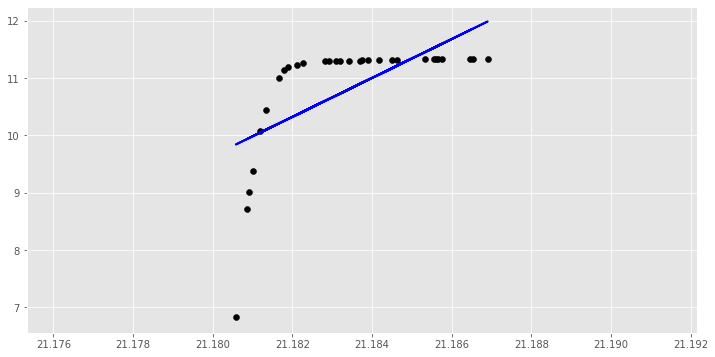

In [58]:
y1 = np.reshape(np.log(model_countries["China"].values), (-1, 1))
X1 = np.reshape([np.log(i.timestamp()) for i in model_countries.index], (-1, 1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)


lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

pred1 = lr1.predict(X1_test)

print("MSE:", mean_squared_error(y1_test, pred))
print("R^2:", r2_score(y1_test, pred1))

plt.figure(figsize=(12,6))
_ = plt.scatter(X1_test, y1_test,  color='black')
_ = plt.plot(X1_test, pred1, color='blue', linewidth=2)

When we compare this model with the above model1(Considering US) the MSE and R^2 values are lower and thus the model is not as good as model1.

Predicting for Today

In [120]:
today = datetime.datetime.now()
t = np.reshape([np.log(today.timestamp())], (-1, 1))

In [121]:
pred = lr.predict(t)

In [122]:
pred

array([[17.11831751]])